## Четвертое дз

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.preprocessing import StandardScaler

In [4]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [5]:
data = pd.read_csv(DATA_PATH + "winequality-white.csv", sep=";")

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [8]:
data.shape

(4898, 12)

In [9]:
y = data['quality']
X = data.drop('quality', axis=1)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size = 0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [246]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [253]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled)))

Mean squared error (train): 0.558
Mean squared error (test): 0.584


Feature: 0, Score: 0.09782
Feature: 1, Score: 0.19226
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.53816
Feature: 4, Score: 0.00813
Feature: 5, Score: 0.04218
Feature: 6, Score: 0.01430
Feature: 7, Score: 0.66572
Feature: 8, Score: 0.15004
Feature: 9, Score: 0.06205
Feature: 10, Score: 0.12953


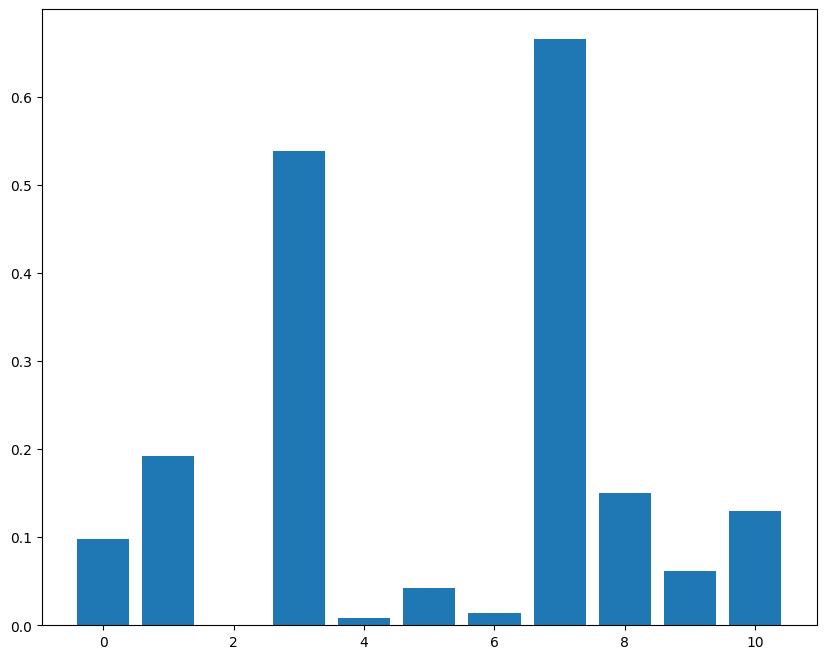

In [263]:
importance = linreg.coef_

for i,v in enumerate(abs(importance)):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

In [257]:
import matplotlib.pyplot as plt

In [264]:
linreg_coef = pd.DataFrame(
    {"coef": linreg.coef_, "coef_abs": np.abs(linreg.coef_)},
    index=data.columns.drop("quality"),
)
linreg_coef.sort_values(by="coef_abs", ascending=False)

,coef,coef_abs
density,-0.665720,0.665720
residual sugar,0.538164,0.538164
volatile acidity,-0.192260,0.192260
pH,0.150036,0.150036
alcohol,0.129533,0.129533
fixed acidity,0.097822,0.097822
sulphates,0.062053,0.062053
free sulfur dioxide,0.042180,0.042180
total sulfur dioxide,0.014304,0.014304
chlorides,0.008127,0.008127


In [267]:
lasso1 = Lasso(alpha=0.1, random_state=17)
lasso1.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, random_state=17)

In [282]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [270]:
pd.DataFrame?

In [279]:
lasso1_coef = pd.DataFrame(
    {'lasso1_coef' : lasso1.coef_, 'abs_lasso1_coef' : abs(lasso1.coef_)}, index=data.columns.drop("quality"))
lasso1_coef.head()
lasso1_coef.sort_values('abs_lasso1_coef', ascending=True)

,lasso1_coef,abs_lasso1_coef
fixed acidity,-0.000000,0.000000
citric acid,-0.000000,0.000000
residual sugar,0.000000,0.000000
chlorides,-0.000000,0.000000
free sulfur dioxide,0.000000,0.000000
total sulfur dioxide,-0.000000,0.000000
density,-0.000000,0.000000
pH,0.000000,0.000000
sulphates,0.000000,0.000000
volatile acidity,-0.093247,0.093247


In [288]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas, random_state=17, cv=5, n_jobs=-1)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5, n_jobs=-1, random_state=17)

In [289]:
lasso_cv.alpha_

0.0002833096101839324

In [290]:
lasso_cv_coef = pd.DataFrame(
    {'lasso_cv_coef' : lasso_cv.coef_, 'lasso_cv_coef_abs' : abs(lasso_cv.coef_)}, index=data.columns.drop('quality'))
lasso_cv_coef.sort_values('lasso_cv_coef_abs', ascending=True)

,lasso_cv_coef,lasso_cv_coef_abs
citric acid,-0.000000,0.000000
chlorides,0.006933,0.006933
total sulfur dioxide,0.012969,0.012969
free sulfur dioxide,0.042698,0.042698
sulphates,0.060939,0.060939
fixed acidity,0.093295,0.093295
alcohol,0.137115,0.137115
pH,0.146549,0.146549
volatile acidity,-0.192049,0.192049
residual sugar,0.526883,0.526883


In [294]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, lasso_cv.predict(X_train_scaled)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, lasso_cv.predict(X_holdout_scaled)))

Mean squared error (train): 0.558
Mean squared error (test): 0.583


## Random Forest

In [10]:
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=17)

In [18]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, forest.predict(X_train_scaled)))
print("Mean squared error (cv): %.3f" % np.mean(abs(cross_val_score(forest, X_train_scaled, y_train, scoring='neg_mean_squared_error'))))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, forest.predict(X_holdout_scaled)))

Mean squared error (train): 0.053
Mean squared error (cv): 0.414
Mean squared error (test): 0.372


In [20]:
%%time
forest_params = {'max_depth': list(range(10, 25)),
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

locally_best_forest = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=17), forest_params,scoring="neg_mean_squared_error", n_jobs=-1, cv=5)
locally_best_forest.fit(X_train_scaled, y_train)

CPU times: total: 8.42 s
Wall time: 6min 43s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=17),
             n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24],
                         'max_features': [6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]},
             scoring='neg_mean_squared_error')

In [21]:
locally_best_forest.best_params_, locally_best_forest.best_score_

({'max_depth': 21, 'max_features': 6, 'min_samples_leaf': 1},
 -0.3977328819150594)

In [26]:
%%time
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, locally_best_forest.predict(X_train_scaled)))
print("Mean squared error (cv): %.3f" % np.mean(abs(cross_val_score(locally_best_forest.best_estimator_, X_train_scaled, y_train, scoring='neg_mean_squared_error'))))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, locally_best_forest.predict(X_holdout_scaled)))

Mean squared error (train): 0.054
Mean squared error (cv): 0.398
Mean squared error (test): 0.366
CPU times: total: 922 ms
Wall time: 921 ms


In [36]:
rf_importance = pd.DataFrame(
    locally_best_forest.best_estimator_.feature_importances_,
    columns=["coef"],
    index=data.columns[:-1],
)
rf_importance.sort_values(by="coef", ascending=False)

,coef
alcohol,0.206056
volatile acidity,0.117578
free sulfur dioxide,0.111556
density,0.088549
pH,0.073659
total sulfur dioxide,0.073640
chlorides,0.073366
residual sugar,0.072072
citric acid,0.062601
fixed acidity,0.061813


Feature: 0, Score: 0.06181
Feature: 1, Score: 0.11758
Feature: 2, Score: 0.06260
Feature: 3, Score: 0.07207
Feature: 4, Score: 0.07337
Feature: 5, Score: 0.11156
Feature: 6, Score: 0.07364
Feature: 7, Score: 0.08855
Feature: 8, Score: 0.07366
Feature: 9, Score: 0.05911
Feature: 10, Score: 0.20606


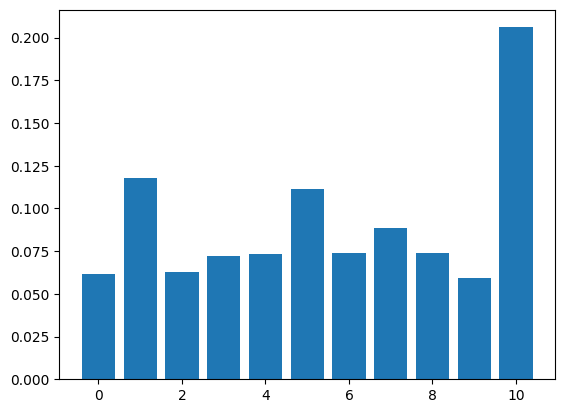

In [40]:
importance = locally_best_forest.best_estimator_.feature_importances_

for i,v in enumerate(abs(importance)):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

In [39]:
import matplotlib.pyplot as plt